In [5]:
import pubchempy as pcp
import pandas as pd
# import cmapBQ.query as cmap_query
# import cmapBQ.config as cmap_config
import os
from cmapPy.pandasGEXpress.parse import parse
import matplotlib.pyplot as plt

# Get Compound IDS from PubChem

In [4]:
def get_compound_ids(drug_name):
    try:
        compounds = pcp.get_compounds(drug_name, 'name')
        
        compound_ids = [compound.cid for compound in compounds]
        
        return compound_ids
    except Exception as e:
        print("An error occurred:", e)
        return []

In [54]:
# pcp.get_compounds("Regorafenib", 'name')

[Compound(11167602)]

## Getting Drug Ids

In [8]:
def read_drugs_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            drugs = [line.strip() for line in file.readlines() if line.strip()]
        return drugs
    except Exception as e:
        print("An error occurred while reading the file:", e)
        return []

file_path = 'C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lusc/ttd_drugs.txt'
drugs = read_drugs_from_file(file_path)

drug_cid = {}

for drug in drugs:
    if "(" in drug: 
        parts = drug.split('(')
        drug_name1 = parts[0].strip()  # Name outside parentheses
        drug_name2 = parts[1].split(')')[0].strip()  # Name inside parentheses

        compound_ids1 = get_compound_ids(drug_name1)
        compound_ids2 = get_compound_ids(drug_name2)

        if compound_ids1 or compound_ids2:
            if compound_ids1 in compound_ids2 or compound_ids2 in compound_ids1:
                if len(compound_ids1) == len(compound_ids2):
                    if drug in drug_cid.keys():
                        drug_cid[drug] = compound_ids1
                    else:
                        drug_cid[drug] = compound_ids1
            else:
                if len(compound_ids1) > len(compound_ids2):
                    if drug_name1 in drug_cid.keys():
                        drug_cid[drug_name1] = compound_ids1
                    else:
                        drug_cid[drug_name1] = compound_ids1
                if len(compound_ids1) > len(compound_ids2):
                    if drug_name2 in drug_cid.keys():
                        drug_cid[drug_name2] = compound_ids2
                    else:
                        drug_cid[drug_name2] = compound_ids2
        # print("Compound IDs for", drug_name1, ":", compound_ids1)
        # print("Compound IDs for", drug_name2, ":", compound_ids2)
    else:
        compound_ids = get_compound_ids(drug)
        # print("Compound IDs for", drug, ":", compound_ids)
        if compound_ids:
            if drug in drug_cid.keys():
                drug_cid[drug] = compound_ids
            else:
                drug_cid[drug] = compound_ids

In [51]:
drug_cid

{'Cabozantinib-S-Malate': [25102846],
 'Futibatinib': [71621331],
 'Lenvatinib Mesylate': [11237762],
 'Nexavar': [216239, 406563],
 'Sorafenib Tosylate': [406563],
 'Pemigatinib': [86705695],
 'Regorafenib': [11167602]}

In [9]:
file_path = 'C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lusc/ttd_cid.txt'

# Write to file
with open(file_path, 'w') as file:
    for key, values in drug_cid.items():
        if values:
            for value in values:
                file.write(f"{key}\t{value}\n")
        else:
            file.write(f"{key}\n")

print(f"Data has been written to {file_path}")


Data has been written to C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lusc/ttd_cid.txt


In [29]:
import re

# File path
input_file_path = 'C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/P1-05-Drug_disease.txt'
output_file_path = "C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lusc/ttd_drugs.txt"


approved_drugs = []

# Read and parse the input file
with open(input_file_path, 'r', encoding='utf-8', errors='ignore') as file:
    lines = file.readlines()

# Determine the start index for actual data
start_index = 0
for i, line in enumerate(lines):
    if line.strip().startswith("TTDDRUID"):
        start_index = i + 1
        break

# Variables to keep track of current drug information
current_drug = None
is_approved = False

# Process the relevant lines
for line in lines[start_index:]:
    # Check for drug name
    if line.startswith("DRUGNAME"):
        current_drug = line.split('\t')[1].strip()
        is_approved = False  # Reset approval status for each new drug

    if line.startswith("INDICATI"):
        parts = line.split('\t')
        # print(parts)
        indication = parts[1].strip()
        if "Lung cancer" in indication:
            if "Approved" in parts[3]:
                is_approved = True

    # If drug is approved, add to the list
    if current_drug and is_approved and "Lung cancer" in indication:
        approved_drugs.append(current_drug)
        # Reset approval status after adding the drug
        is_approved = False
        current_drug = None

# Write results to the output file
with open(output_file_path, 'w') as file:
    for drug in approved_drugs:
        file.write(f"{drug}\n")

print(f"Approved drugs have been written to {output_file_path}")

Approved drugs have been written to C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lihc/ttd_drugs.txt


In [2]:
import re

# File path
input_file_path = 'C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/P1-05-Drug_disease.txt'
output_file_path = "C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lusc/ttd_drugs.txt"

approved_drugs = []

# Read and parse the input file
with open(input_file_path, 'r', encoding='utf-8', errors='ignore') as file:
    lines = file.readlines()

# Determine the start index for actual data
start_index = 0
for i, line in enumerate(lines):
    if line.strip().startswith("TTDDRUID"):
        start_index = i + 1
        break

# Variables to keep track of current drug information
current_drug = None
is_approved = False

# Process the relevant lines
for line in lines[start_index:]:
    # Check for drug name
    if line.startswith("DRUGNAME"):
        current_drug = line.split('\t')[1].strip()
        is_approved = False  # Reset approval status for each new drug

    if line.startswith("INDICATI"):
        parts = line.split('\t')
        # Check if 'Approved' is in either parts[3] or parts[4]
        approval_status = parts[3] if len(parts) > 3 else ''
        approval_status_4 = parts[4] if len(parts) > 4 else ''
        indication = parts[1].strip()

        # Check for both "Lung cancer" and "Non-small cell lung cancer" in the indication
        if re.search(r"(Lung cancer|Non-small-cell lung cancer)", indication, re.IGNORECASE):
            if "Approved" in approval_status or "Approved" in approval_status_4:
                is_approved = True

    # If drug is approved, add to the list
    if current_drug and is_approved and re.search(r"(Lung cancer|Non-small-cell lung cancer)", indication, re.IGNORECASE):
        approved_drugs.append(current_drug)
        # Reset approval status after adding the drug
        is_approved = False
        current_drug = None

# Write results to the output file
with open(output_file_path, 'w') as file:
    for drug in approved_drugs:
        file.write(f"{drug}\n")

print(f"Approved drugs have been written to {output_file_path}") 


Approved drugs have been written to C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/lusc/ttd_drugs.txt


In [55]:
import tarfile
import os
import glob
from cmapPy.pandasGEXpress.parse import parse

# Define the path to the folder containing the .tar.gz files
folder_path = 'C:/Users/areeba khan/Documents/UdS/Master Thesis/CMAP_Output/prad/equal_set/degs/prad_100_degs.tar.gz'
temp_extract_path = 'C:/Users/areeba khan/Documents/UdS/Master Thesis/CMAP_Output/prad/equal_set/degs/temp'  # Temp path to extract .gctx files

if not os.path.exists(temp_extract_path):
    os.makedirs(temp_extract_path)

tar_gz_files = glob.glob(os.path.join(folder_path, '*.tar.gz'))
with tarfile.open(folder_path, 'r:gz') as tar:
    for member in tar.getmembers():
        if member.name.endswith('/matrices/gutc/ps_pert_cell.gctx') and 'gutc/' in member.name:
            # Extract the .gctx file temporarily to disk
            gctx_file_path = os.path.join(temp_extract_path, os.path.basename(member.name))
            with open(gctx_file_path, 'wb') as f_out:
                f_out.write(tar.extractfile(member).read())

            cmp_data = parse(gctx_file_path)
            metadata = cmp_data.row_metadata_df
            cmap_scores = cmp_data.data_df

            metadata.reset_index(drop = True, inplace = True)
            mcf7_brd_df = metadata[metadata['pert_id'].str.contains('BRD') & metadata['cell_id'].str.contains('PC3') & metadata['pert_type'].str.contains('trt_cp')]
            
            cmap_scores.reset_index(inplace=True)
            cmap_scores.columns = ["cid", "TAG"]

            mcf7_scores = cmap_scores[cmap_scores['cid'].str.contains('BRD') & cmap_scores['cid'].str.contains('PC3')]
            mcf7_scores['pert_id'] = mcf7_scores['cid'].str.split(':', expand=True)[0]

            merged_df = pd.merge(mcf7_scores, mcf7_brd_df[['pert_id', 'pert_iname', 'pert_type']], on='pert_id')
            final_df = merged_df[['pert_id', 'pert_iname', 'TAG']]

            os.remove(gctx_file_path)



c:\Users\areeba khan\AppData\Local\Programs\Python\Python310\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\areeba khan\AppData\Local\Programs\Python\Python310\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
C:\Users\areeba khan\AppData\Local\Temp\ipykernel_12816\3325362207.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [56]:
with open("C:/Users/areeba khan/Documents/UdS/Master Thesis/CMAP_Output/prad/prad_cmap_cmps.txt", "w") as f:
    for cmp in final_df["pert_iname"].tolist():
        f.write(cmp.lower() + "\n")

# CMAP Filtering

In [3]:
def read_gctx_file(file):
    cmp_data = parse(file)
    metadata = cmp_data.row_metadata_df
    cmap_scores = cmp_data.data_df
    # cmapdrugs_scores

    metadata.reset_index(drop = True, inplace = True)
    mcf7_brd_df = metadata[metadata['pert_id'].str.contains('BRD') & metadata['cell_id'].str.contains('MCF7') & metadata['pert_type'].str.contains('trt_cp')]
    
    cmap_scores.reset_index(inplace=True)
    cmap_scores.columns = ["cid", "TAG"]

    mcf7_scores = cmap_scores[cmap_scores['cid'].str.contains('BRD') & cmap_scores['cid'].str.contains('MCF7')]
    mcf7_scores['pert_id'] = mcf7_scores['cid'].str.split(':', expand=True)[0]

    merged_df = pd.merge(mcf7_scores, mcf7_brd_df[['pert_id', 'pert_iname', 'pert_type']], on='pert_id')
    final_df = merged_df[['pert_id', 'pert_iname', 'TAG']]
    cmap_name_cids = pd.read_csv("cmap_cmps_cids.txt", header=None, sep="\t")

    cmap_name_cids.columns = ['pert_iname', 'cid']

    cmap_name_cids['pert_iname'] = cmap_name_cids['pert_iname'].str.lower()

    cmap_name_cids.drop_duplicates(inplace=True)

    cmap_name_cids = cmap_name_cids.dropna(subset=['cid'])

    cmap_name_cids = cmap_name_cids.groupby('pert_iname')['cid'].agg(lambda x: ','.join(x.astype(str).unique())).reset_index()
    cmap_name_cids['pert_iname'] = cmap_name_cids['pert_iname'].str.lower()

    final_df['pert_iname'] = final_df['pert_iname'].str.lower()
    cmap = pd.merge(cmap_name_cids, final_df[['pert_id', 'pert_iname', 'TAG']], on='pert_iname')

    cmap['pert_iname'] = cmap['pert_iname'].str.lower()

    cmap_grouped = cmap.groupby(['pert_iname', 'TAG'], as_index=False).agg({
        'cid': lambda x: ','.join(x)
    })

    cmap = cmap_grouped.drop_duplicates()

    def unique_join(val):
        cids = val.split(',')
        cids = [str(int(float(cid))) for cid in cids]
        return ','.join(sorted(set(cids)))

    cmap['cid'] = cmap['cid'].apply(unique_join)

    cmap.reset_index(drop=True, inplace=True)

    return cmap

## DRUG Filtering

In [4]:
def drug_filter(cid_file, ref_drug):
    with open(cid_file, "r") as file:
        lines = file.readlines()

    drugs = []
    ids = []

    for line in lines:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            drugs.append(parts[0].lower())
            ids.append(parts[1])

    df = pd.DataFrame({"Drug": drugs, "Cid": ids})

    # df.dropna(inplace=True)
    # df.reset_index(drop=True, inplace=True)
    df = df.groupby('Drug')['Cid'].agg(lambda x: ','.join(x.astype(str).unique())).reset_index()
    df['Drug'] = df['Drug'].str.lower()
    df_merge = pd.merge(df, ref_drug["Drug"], on = "Drug")
    return df_merge

In [5]:
def remove_drug(drug_df, cmap):
    keep = []
    for i in range(len(drug_df)):
        cids = drug_df.iloc[i, 1].split(",") 
        for k in range(len(cmap)):
            cids_cmap = str(cmap.iloc[k, 2])
            # print(cids_cmap)
            if isinstance(cids_cmap, str):
                cids_cmap = cids_cmap.split(",")
                if any(cid in cids_cmap for cid in cids):
                    keep.append(i)
                    break

    filtered_drug = drug_df.iloc[keep]
    return filtered_drug

In [6]:
def function_call(file):    
    cmap = read_gctx_file(file)
    ttd_drug = pd.read_csv("C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/ttd_drugs.txt", sep="\t", header=None, names = ["Drug", "ID"])
    ttd_drug.iloc[:, 0] = ttd_drug.iloc[:, 0].str.lower()
    ttd_drug.drop_duplicates(inplace=True)

    nci_ref_drugs = pd.read_csv("C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/nci_drugs.txt", sep="\t", header=None, names = ["Drug"])
    nci_ref_drugs.iloc[:, 0] = nci_ref_drugs.iloc[:, 0].str.lower()
    nci_ref_drugs.drop_duplicates(inplace=True)

    # print("TTD Drugs:")
    # print(ttd_drug)
    # print("NCI Drugs:")
    # print(nci_ref_drugs)

    ttd_drug_cids = drug_filter("C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/ttd_cid.txt", ttd_drug)
    nci_drug_cids = drug_filter("C:/Users/areeba khan/Documents/UdS/Master Thesis/Drugs/nci_cid.txt", nci_ref_drugs)

    nci = remove_drug(nci_drug_cids, cmap)
    ttd = remove_drug(ttd_drug_cids, cmap)

    approved_drugs = pd.concat([ttd, nci], ignore_index=True)
    approved_drugs['Drug'] = approved_drugs['Drug'].str.lower()
    approved_drugs = approved_drugs.groupby('Drug')['Cid'].apply(lambda x: ','.join(x)).reset_index()

    approved_drugs.drop_duplicates(inplace=True)

    approved_drugs['Cid'] = approved_drugs['Cid'].apply(lambda x: ','.join(set(x.split(','))))

    keep = []
    for i in range(len(approved_drugs)):
        cids = set(approved_drugs.iloc[i, 1].split(','))
        for k in range(len(approved_drugs)):
            cids_cmap = set(approved_drugs.iloc[k, 1].split(','))
            cut = cids.intersection(cids_cmap)
            if cut and len(cids) < len(cids_cmap):
                keep.append(i)
                break

    if keep:
        approved_drugs = approved_drugs.drop(keep).reset_index(drop=True)
    
    cmap_grouped_sorted = cmap.sort_values(by='TAG', ascending=True).reset_index(drop=True)

    return cmap_grouped_sorted, approved_drugs

# Overlap Coefficient Relevant Compounds

In [7]:
cmap_100_deg, approved_drugs = function_call("ps_pert_cell.gctx")
# cmap_150_deg, approved_drugs = function_call("DEGs/variable_size/top_150_degs/ps_pert_cell.gctx")
# cmap_200_deg, approved_drugs = function_call("DEGs/variable_size/top_200_degs/ps_pert_cell.gctx")
# cmap_300_deg, approved_drugs = function_call("DEGs/variable_size/top_300_degs/ps_pert_cell.gctx")


c:\Users\areeba khan\AppData\Local\Programs\Python\Python310\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\areeba khan\AppData\Local\Programs\Python\Python310\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
C:\Users\areeba khan\AppData\Local\Temp\ipykernel_26864\1915819458.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [8]:
overlap_100 = {}
overlap_150 = {}
overlap_200 = {}
overlap_300 = {}

In [43]:
def overlap_coefficient_relevant(compound_df, approved_drugs_df):
    # Filter compounds with TAG value <= -95
    filtered_compound_df = compound_df[compound_df['TAG'] <= -95]
    
    count = 0
    
    for i, row in filtered_compound_df.iterrows():
        cids = str(row['cid']).split(",")
        for j, approved_row in approved_drugs_df.iterrows():
            cids_cmap = str(approved_row['Cid']).split(",")
            if any(cid in cids_cmap for cid in cids):
                count += 1
                break
    
    min_size = min(len(filtered_compound_df), len(approved_drugs_df))
    coeff = count / min_size if min_size > 0 else 0
    return round(coeff * 100)

overlap_100["100 Variable MDS"] = overlap_coefficient_relevant(cmap_100_deg, approved_drugs)
overlap_150["150 Variable MDS"] = overlap_coefficient_relevant(cmap_150_deg, approved_drugs)
overlap_200["Full Set MDS"] = overlap_coefficient_relevant(cmap_200_deg, approved_drugs)
overlap_300["300 Variable DEGs"] = overlap_coefficient_relevant(cmap_300_deg, approved_drugs)


In [48]:
overlap_100

{'100 Variable DEGs': 4}

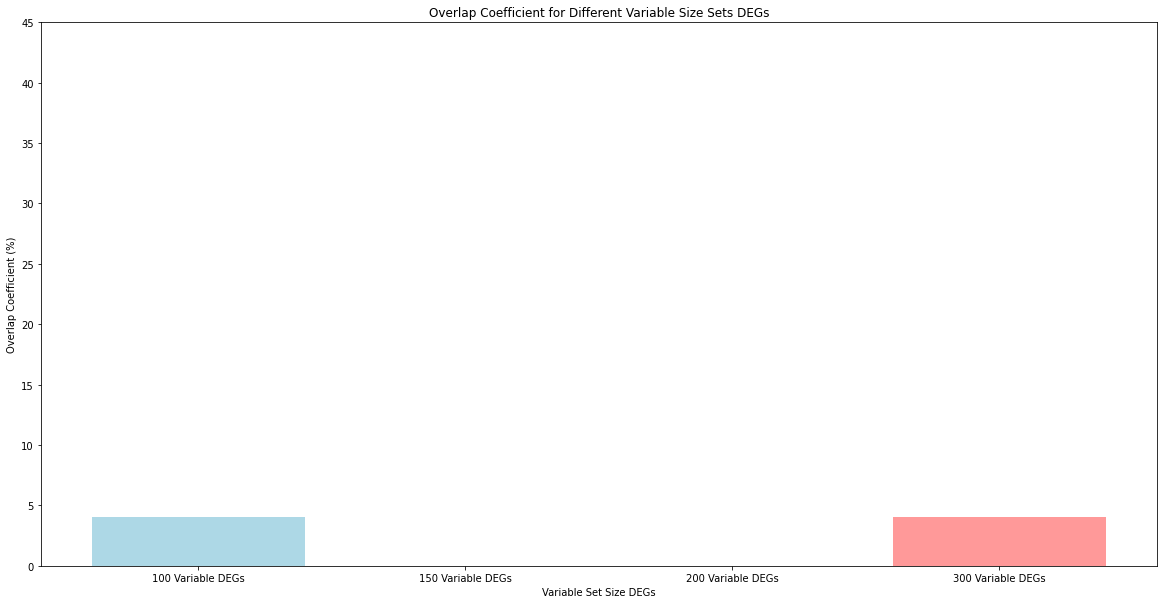

In [44]:
overlap_results = {**overlap_100, **overlap_150, **overlap_200, **overlap_300}

# Plotting the results
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size here
colors = ['lightblue', 'lightgreen', '#ffd699', '#ff9999']  # Define the colors for each bar
ax.bar(overlap_results.keys(), overlap_results.values(), color=colors)

# Setting the labels and title
ax.set_xlabel('Variable Set Size DEGs')
ax.set_ylabel('Overlap Coefficient (%)')
ax.set_title('Overlap Coefficient for Different Variable Size Sets DEGs')
plt.ylim(0, 45) 
# Show the plot
plt.show()

# Overlap Coefficient

In [58]:
cmap_100_mds, approved_drugs = function_call("MDS/variable_size/top_100_mds/ps_pert_cell.gctx")
cmap_50_mds, approved_drugs = function_call("MDS/variable_size/top_50_mds/ps_pert_cell.gctx")
cmap_full_mds, approved_drugs = function_call("MDS/variable_size/full/ps_pert_cell.gctx")


c:\Users\areeba khan\AppData\Local\Programs\Python\Python310\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\areeba khan\AppData\Local\Programs\Python\Python310\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
C:\Users\areeba khan\AppData\Local\Temp\ipykernel_27820\1915819458.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [70]:
overlap_100["100 Variable MDS"] = overlap_coefficient_relevant(cmap_100_mds, approved_drugs)
overlap_150["50 Variable MDS"] = overlap_coefficient_relevant(cmap_50_mds, approved_drugs)
overlap_200["Full Set MDS"] = overlap_coefficient_relevant(cmap_full_mds, approved_drugs)

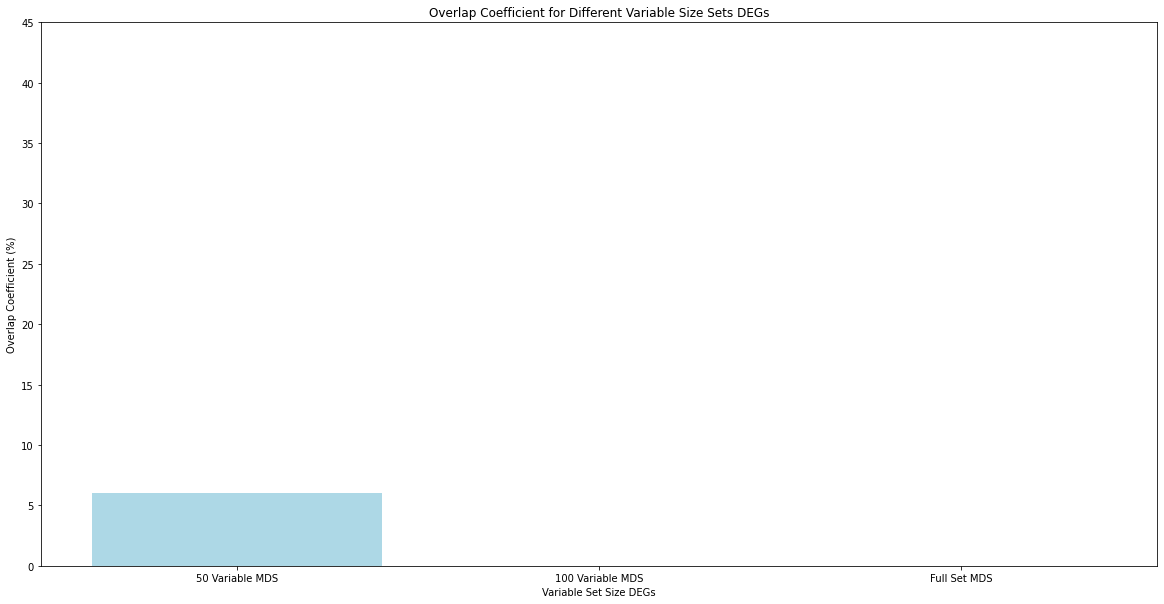

In [71]:
overlap_results = {**overlap_150, **overlap_100, **overlap_200}

# Plotting the results
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size here
colors = ['lightblue', 'lightgreen', '#ffd699', '#ff9999']  # Define the colors for each bar
ax.bar(overlap_results.keys(), overlap_results.values(), color=colors)

# Setting the labels and title
ax.set_xlabel('Variable Set Size DEGs')
ax.set_ylabel('Overlap Coefficient (%)')
ax.set_title('Overlap Coefficient for Different Variable Size Sets DEGs')
plt.ylim(0, 45) 
# Show the plot
plt.show()

In [9]:
overlap_100_coeff = {}
overlap_150_coeff = {}
overlap_200_coeff = {}
overlap_300_coeff = {}

In [11]:
def overlap_coefficient(compound_df, approved_drugs_df, n):
    count = 0
    first_n_items = compound_df.head(n)
    
    for i, row in first_n_items.iterrows():
        cids = str(row['cid']).split(",")
        for j, approved_row in approved_drugs_df.iterrows():
            cids_cmap = str(approved_row['Cid']).split(",")
            if any(cid in cids_cmap for cid in cids):
                count += 1
                break
    
    min_size = min(len(first_n_items), len(approved_drugs_df))
    # print(count)
    coeff = count / min_size
    return round(coeff * 100)

for n in [10, 20, 50, 100, 150, 200]:
    score = overlap_coefficient(cmap_100_deg, approved_drugs, n)
    overlap_200_coeff[f'Top {n} Compounds Overlap'] = score
    # print(score)
# print(overlap_200_coeff)


{'Top 10 Compounds Overlap': 0, 'Top 20 Compounds Overlap': 0, 'Top 50 Compounds Overlap': 4, 'Top 100 Compounds Overlap': 7, 'Top 150 Compounds Overlap': 7, 'Top 200 Compounds Overlap': 14}


In [56]:
def overlap_plot(dicts):
    x_values = [10, 20, 50, 100, 150, 200]
    labels = ["100 MDS of variable size", "50 MDS of variable size", "200 Hub of variable size", "300 Hub of variable size"]

    fig, ax = plt.subplots(figsize=(15, 9))
    plt.subplots_adjust(bottom=0.2)
    
    for i, data_dict in enumerate(dicts, start=1):
        label = labels[i-1] if i <= len(labels) else f'Dataset {i}'
        y_values = []
        for x in x_values:
            key = f'Top {x} Compounds Overlap'
            if key in data_dict:
                y_values.append(data_dict[key])
            else:
                y_values.append(0)  
        plt.plot(x_values, y_values, marker='s', label=label)

    plt.xlabel('Cmap N Compounds')
    plt.ylabel('Overlap Coefficient (%)')
    plt.title('Overlap of Top N Compounds')
    plt.grid(True)
    plt.xticks(x_values) 
    plt.legend()
    plt.ylim(0, 55) 
    plt.show()


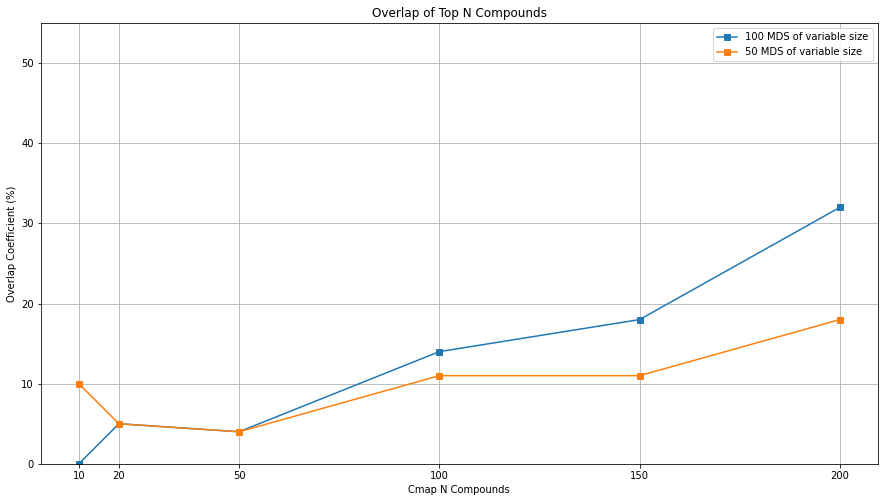

In [57]:
overlap_plot([overlap_100_coeff, overlap_150_coeff])

In [ ]:
### For Full Sets

x_values = [10, 20, 50, 100, 150, 200]
y_values = []

for x in x_values:
    key = f'Top {x} Compounds Overlap'
    if key in overlap_200_coeff:
        y_values.append(overlap_200_coeff[key])
    else:
        y_values.append(0)  

fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

plt.plot(x_values, y_values, marker='s', label='Full MDS Gene Set')

plt.xlabel('Cmap N Compounds')
plt.ylabel('Overlap Coefficient (%)')
plt.title('Overlap of Top N Compounds')
plt.grid(True)
plt.xticks(x_values) 
plt.legend()
plt.ylim(0, 55)
plt.show()
